<a href="https://colab.research.google.com/github/ReidelVichot/LC_identification/blob/main/AirQuality11_07_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting the Environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# -- Setting environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# -- Load county shapefiles
dir = "/content/drive/MyDrive/Disertation/countyshp/"
county = gpd.read_file(dir + "tl_2010_us_county00/tl_2010_us_county00.shp")
county = county[["CNTYIDFP00", "geometry"]]

Mounted at /content/drive


#Defining Functions

In [2]:
def gen_GEOID(df):
  # generate GEOID
  df["GEOID"] = df["State Code"].astype(str).str.zfill(2) + df["County Code"].astype(str).str.zfill(3)
  df = df.drop(columns=["State Code", "County Code"])
  return df

def gen_year(df):
  # get year
  df["year"] = df["Date"].str[:4].astype(int)
  df = df.drop(columns="Date")
  return df

def grouping(df):
  df = df.groupby(["GEOID", "year"]).agg(["mean", "std", "max", "min"])
  # combining columns
  df.columns = ["_".join(col) for col in df.columns]
  df = df.reset_index()
  return df

def get_AQI(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/AQI"
  fname = f"/daily_aqi_by_county_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date", "AQI"]]
  return df

def get_CO(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/CO"
  fname = f"/daily_42101_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean"]]
  df.columns = ["State Code", "County Code", "Date", "CO"]
  return df

def get_NO2(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/NO2"
  fname = f"/daily_42602_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean"]]
  df.columns = ["State Code", "County Code", "Date", "NO2"]
  return df

def get_Ozone(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/Ozone"
  fname = f"/daily_44201_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean"]]
  df.columns = ["State Code", "County Code", "Date", "Ozone"]
  return df

def get_SO2(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/SO2"
  fname = f"/daily_42401_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean"]]
  df.columns = ["State Code", "County Code", "Date", "SO2"]
  return df

def get_PM25(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/PM25"
  fname = f"/daily_SPEC_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean"]]
  df.columns = ["State Code", "County Code", "Date", "PM2.5"]
  return df

def get_PM10(year):
  dir = "/content/drive/MyDrive/Disertation/EPA_data/PM10"
  fname = f"/daily_PM10SPEC_{year}.csv"
  df = pd.read_csv(dir + fname, low_memory=False)
  df = df[["State Code", "County Code", "Date Local", "Arithmetic Mean"]]
  df.columns = ["State Code", "County Code", "Date", "PM10"]
  return df

def get_param(param, year):
  match param:
    case "AQI":
      return get_AQI(year)
    case "CO":
      return get_CO(year)
    case "NO2":
      return get_CO(year)
    case "SO2":
      return get_SO2(year)
    case "Ozone":
      return get_Ozone(year)

#Calculating Parameters

##AQI

In [ ]:
# -- Create aqi dataframe
aqi = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_AQI(year))))
  aqi = pd.concat([aqi, df]).reset_index().drop(columns="index")

# -- Merge aqi and county
print(len(aqi))
aqi = county.merge(aqi, right_on="GEOID", left_on="CNTYIDFP00", how="right")
aqi = aqi.drop(columns="CNTYIDFP00")
print(len(aqi))

26504
26504


##CO

In [ ]:
# -- Create CO dataframe
co = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_CO(year))))
  co = pd.concat([co, df]).reset_index().drop(columns="index")

# -- Merge CO and county
print(len(co))
co = county.merge(co, right_on="GEOID", left_on="CNTYIDFP00", how="right")
co = co.drop(columns="CNTYIDFP00")
print(len(co))

5214
5214


##NO2

In [ ]:
# -- Create NO2 dataframe
no2 = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_NO2(year))))
  no2 = pd.concat([no2, df]).reset_index().drop(columns="index")

# -- Merge NO2 and county
print(len(no2))
no2 = county.merge(no2, right_on="GEOID", left_on="CNTYIDFP00", how="right")
no2 = no2.drop(columns="CNTYIDFP00")
print(len(no2))

6328
6328


##Ozone

In [ ]:
# -- Create ozone dataframe
ozone = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_Ozone(year))))
  ozone = pd.concat([ozone, df]).reset_index().drop(columns="index")

# -- Merge ozone and county
print(len(ozone))
ozone = county.merge(ozone, right_on="GEOID", left_on="CNTYIDFP00", how="right")
ozone = ozone.drop(columns="CNTYIDFP00")
print(len(ozone))

19088
19088


##SO2

In [ ]:
# -- Create so2 dataframe
so2 = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_SO2(year))))
  so2 = pd.concat([so2, df]).reset_index().drop(columns="index")

# -- Merge so2 and county
print(len(so2))
so2 = county.merge(so2, right_on="GEOID", left_on="CNTYIDFP00", how="right")
so2 = so2.drop(columns="CNTYIDFP00")
print(len(so2))

8248
8248


##PM2.5

In [ ]:
# -- Create pm25 dataframe
pm25 = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_PM25(year))))
  pm25 = pd.concat([pm25, df]).reset_index().drop(columns="index")

# -- Merge pm25 and county
print(len(pm25))
pm25 = county.merge(pm25, right_on="GEOID", left_on="CNTYIDFP00", how="right")
pm25 = pm25.drop(columns="CNTYIDFP00")
print(len(pm25))

15074
15074


##PM10

In [ ]:
# -- Create pm10 dataframe
pm10 = pd.DataFrame()

for year in range(1998, 2023):
  df = grouping(gen_year(gen_GEOID(get_PM10(year))))
  pm10 = pd.concat([pm10, df]).reset_index().drop(columns="index")

# -- Merge pm10 and county
print(len(pm10))
pm10 = county.merge(pm10, right_on="GEOID", left_on="CNTYIDFP00", how="right")
pm10 = pm10.drop(columns="CNTYIDFP00")
print(len(pm10))

10358
10358


#Descriptive Statistics

In [ ]:
# Removing Non-contiguous counties
for i in ['02', '15', '60', '66', '69', '72', '78', "80"]:
  aqi = aqi[aqi.GEOID.str[:2] != i]
  co = co[co.GEOID.str[:2] != i]
  no2 = no2[no2.GEOID.str[:2] != i]
  ozone = ozone[ozone.GEOID.str[:2] != i]
  so2 = so2[so2.GEOID.str[:2] != i]
  pm25 = pm25[pm25.GEOID.str[:2] != i]
  pm10 = pm10[pm10.GEOID.str[:2] != i]

In [ ]:
# Save Everything
aqi.to_csv("/content/drive/MyDrive/Disertation/aqi.csv", index=False)
co.to_csv("/content/drive/MyDrive/Disertation/co.csv", index=False)
no2.to_csv("/content/drive/MyDrive/Disertation/no2.csv", index=False)
ozone.to_csv("/content/drive/MyDrive/Disertation/ozone.csv", index=False)
so2.to_csv("/content/drive/MyDrive/Disertation/so2.csv", index=False)
pm25.to_csv("/content/drive/MyDrive/Disertation/pm25.csv", index=False)
pm10.to_csv("/content/drive/MyDrive/Disertation/pm10.csv", index=False)

In [6]:
# Import everything
aqi = pd.read_csv("/content/drive/MyDrive/Disertation/aqi.csv")
print(f"AQI imported ... {len(aqi)} entries")
co = pd.read_csv("/content/drive/MyDrive/Disertation/co.csv")
print(f"CO imported ... {len(co)} entries")
no2 = pd.read_csv("/content/drive/MyDrive/Disertation/no2.csv")
print(f"NO2 imported ... {len(no2)} entries")
ozone = pd.read_csv("/content/drive/MyDrive/Disertation/ozone.csv")
print(f"Ozone imported ... {len(ozone)} entries")
so2 = pd.read_csv("/content/drive/MyDrive/Disertation/so2.csv")
print(f"SO2 imported ... {len(so2)} entries")
pm25 = pd.read_csv("/content/drive/MyDrive/Disertation/pm25.csv")
print(f"PM2.5 imported ... {len(pm25)} entries")
pm10 = pd.read_csv("/content/drive/MyDrive/Disertation/pm10.csv")
print(f"PM10 imported ... {len(pm10)} entries")
print("......... Completed .........")

AQI imported ... 25785 entries
CO imported ... 5039 entries
NO2 imported ... 6238 entries
Ozone imported ... 18919 entries
SO2 imported ... 8039 entries
PM2.5 imported ... 14551 entries
PM10 imported ... 9943 entries


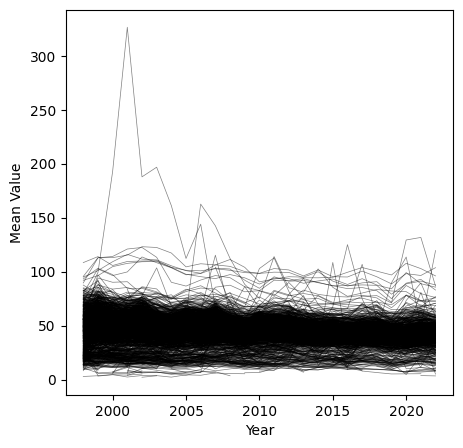

In [19]:
# Plotting trends
fig, ax = plt.subplots(figsize=(5,5))

for i in aqi.GEOID.unique():
  df = aqi[aqi.GEOID == i]
  ax.plot(df.year, df.AQI_mean, color="black", alpha=0.5, linewidth=0.5 )



ax.set_xlabel("Year")
ax.set_ylabel("Mean Value")

fig.show()

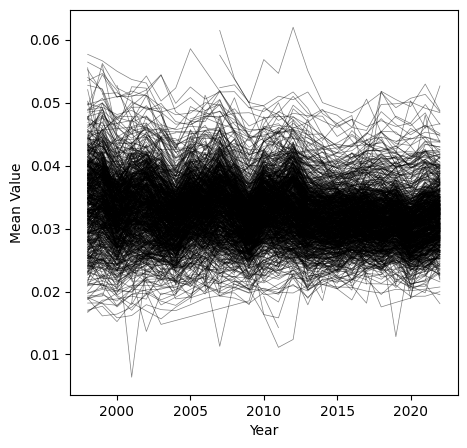

In [18]:
# Plotting trends
fig, ax = plt.subplots(figsize=(5, 5))

for i in ozone.GEOID.unique():
  df = ozone[ozone.GEOID == i]
  ax.plot(df.year, df.Ozone_mean, color="black", alpha=0.5, linewidth=0.5 )



ax.set_xlabel("Year")
ax.set_ylabel("Mean Value")

fig.show()

In [ ]:
# Plotting trends
fig, ax = plt.subplots(figsize=(5,5))

for i in co.GEOID.unique():
  df = co[co.GEOID == i]
  ax.plot(df.year, df.CO_mean, color="black", alpha=0.5, linewidth=0.5 )

ax.set_xlabel("Year")
ax.set_ylabel("Mean Value")

fig.show()

In [ ]:
# Plotting trends
fig, ax = plt.subplots(figsize=(5,5))

for i in no2.GEOID.unique():
  df = no2[no2.GEOID == i]
  ax.plot(df.year, df.NO2_mean, color="black", alpha=0.5, linewidth=0.5 )

ax.set_xlabel("Year")
ax.set_ylabel("Mean Value")

fig.show()

In [ ]:
# Plotting trends
fig, ax = plt.subplots(figsize=(5, 5))

for i in so2.GEOID.unique():
  df = so2[so2.GEOID == i]
  ax.plot(df.year, df.SO2_mean, color="black", alpha=0.5, linewidth=0.5 )

ax.set_xlabel("Year")
ax.set_ylabel("Mean Value")

fig.show()

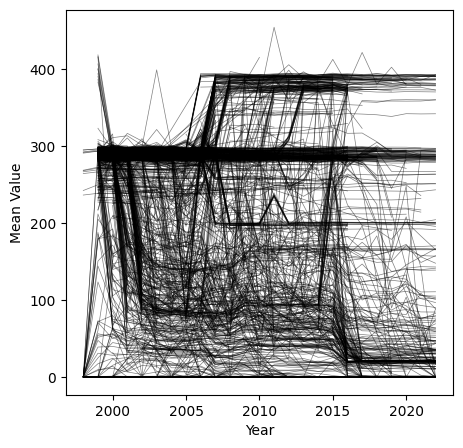

In [21]:
# Plotting trends
fig, ax = plt.subplots(figsize=(5,5))

for i in pm25.GEOID.unique():
  df = pm25[pm25.GEOID == i]
  ax.plot(df.year, df["PM2.5_mean"], color="black", alpha=0.5, linewidth=0.5 )



ax.set_xlabel("Year")
ax.set_ylabel("Mean Value")

fig.show()

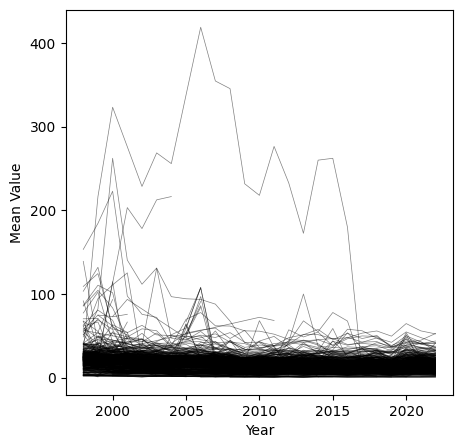

In [20]:
# Plotting trends
fig, ax = plt.subplots(figsize=(5,5))

for i in pm10.GEOID.unique():
  df = pm10[pm10.GEOID == i]
  ax.plot(df.year, df.PM10_mean, color="black", alpha=0.5, linewidth=0.5 )

ax.set_xlabel("Year")
ax.set_ylabel("Mean Value")

fig.show()